In [1]:
#import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [5]:
#reading data set

df = pd.read_csv("C:/Users/DELL/Downloads/FC.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
#describing data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [9]:
#accessing particular featurs and lables
cdf=df[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_HWY','CO2EMISSIONS']]
cdf.head(9)

,CYLINDERS,ENGINESIZE,FUELCONSUMPTION_HWY,CO2EMISSIONS
0,4,2.0,6.7,196
1,4,2.4,7.7,221
2,4,1.5,5.8,136
3,6,3.5,9.1,255
4,6,3.5,8.7,244
5,6,3.5,7.7,230
6,6,3.5,8.1,232
7,6,3.7,9.0,255
8,6,3.7,9.5,267


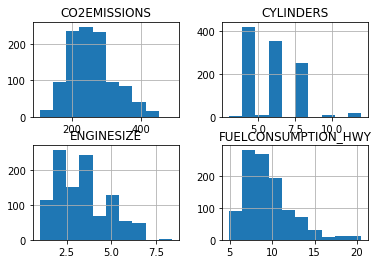

In [10]:
#graph plotin
gra=cdf[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_HWY','CO2EMISSIONS']]
gra.hist()
plt.show()

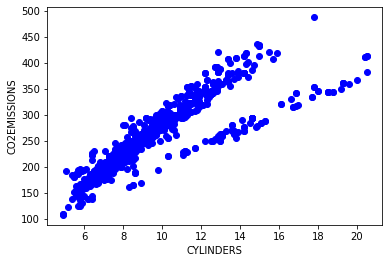

In [72]:
#one feature vs our predicting feature graph
plt.scatter(cdf.FUELCONSUMPTION_HWY,cdf.CO2EMISSIONS,color='blue')
plt.ylabel("CO2EMISSIONS")
plt.xlabel("CYLINDERS")
plt.show()

In [73]:
#spliting data set into training and test
msk=np.random.rand(len(df))<0.7
train=cdf[msk]
test=cdf[~msk]

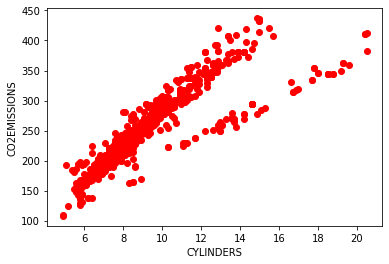

In [74]:
#ploting graph of splited data
plt.scatter(train.FUELCONSUMPTION_HWY,train.CO2EMISSIONS,color='red')
plt.ylabel("CO2EMISSIONS")
plt.xlabel("CYLINDERS")
plt.show()

In [75]:
#train model
from sklearn import linear_model
reg=linear_model.LinearRegression()
trainx=np.asanyarray(train[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_HWY']])
trainy=np.asanyarray(train[['CO2EMISSIONS']])
reg.fit(trainx,trainy)
print('coefficeant -',reg.coef_)
print('intercept -',reg.intercept_)

coefficeant - [[ 9.64945096 11.76353075 10.09163796]]
intercept - [64.83688342]


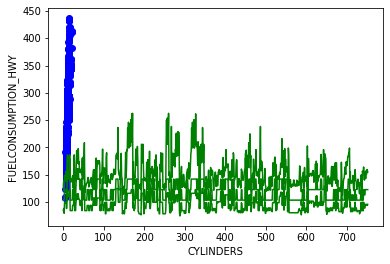

In [76]:
#here we print the plot of our train model using this formula: Y=intercept+coefficeant*X

plt.scatter(train.FUELCONSUMPTION_HWY,train.CO2EMISSIONS,color='blue')
plt.plot(reg.intercept_[0] + reg.coef_[0][0]*trainx, '-g')
plt.ylabel("FUELCONSUMPTION_HWY")
plt.xlabel("CYLINDERS")
plt.show()

In [77]:
#testing data
from sklearn.metrics import r2_score
testx=np.asanyarray(test[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_HWY']])
testy=np.asanyarray(test[['CO2EMISSIONS']])
test_y=reg.predict(test[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_HWY']])
print("mean absolute error : %.2f" %np.mean(np.absolute(test_y-testy)))
print("mean squar error : %.2f" %np.mean((test_y-testy)**2))
print("r2 score : %.2f" %r2_score(test_y,testy))
print("varince scor : %.2f " %reg.score(testx,testy))

mean absolute error : 16.80
mean squar error : 524.45
r2 score : 0.84
varince scor : 0.87 
